In [1]:
import cv2

In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [4]:
from keras.optimizers import Adam

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_data_gen.flow_from_directory('data/train',target_size=(48, 48),batch_size=64,color_mode="grayscale",class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [8]:
validation_generator = validation_data_gen.flow_from_directory('data/test',target_size=(48, 48),batch_size=64,color_mode="grayscale",class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [9]:
emotion_model = Sequential()

In [10]:
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

C:\Users\SHREYAS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

In [12]:
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [13]:
cv2.ocl.setUseOpenCL(False)

In [14]:
lr=0.0001
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr, decay=1e-6), metrics=['accuracy'])

C:\Users\SHREYAS\anaconda3\lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [15]:
emotion_model_info = emotion_model.fit(train_generator,steps_per_epoch=28709 // 64,
                                                 epochs=50,
                                                 validation_data=validation_generator,validation_steps=7178 // 64)

Epoch 1/50


C:\Users\SHREYAS\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 318s 700ms/step - accuracy: 0.2480 - loss: 1.8250 - val_accuracy: 0.3507 - val_loss: 1.6783
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.3125 - loss: 1.6358 - val_accuracy: 0.3000 - val_loss: 1.7568
Epoch 3/50


C:\Users\SHREYAS\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 216s 479ms/step - accuracy: 0.3555 - loss: 1.6480 - val_accuracy: 0.4067 - val_loss: 1.5312
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.3906 - loss: 1.5540 - val_accuracy: 0.3000 - val_loss: 1.4356
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 258s 577ms/step - accuracy: 0.4085 - loss: 1.5316 - val_accuracy: 0.4396 - val_loss: 1.4600
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.5156 - loss: 1.3387 - val_accuracy: 0.5000 - val_loss: 1.3129
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 128s 284ms/step - accuracy: 0.4371 - loss: 1.4638 - val_accuracy: 0.4648 - val_loss: 1.4075
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.3594 - loss: 1.5783 - val_accuracy: 0.8000 - val_loss: 0.7213
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 116s 258ms/step - accuracy: 0.4689 - loss: 1.3985 - val_accuracy: 0.4947 - val_loss: 1.3365
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.3438 - loss: 1.4394 - val_ac

In [30]:
import matplotlib.pyplot as plt

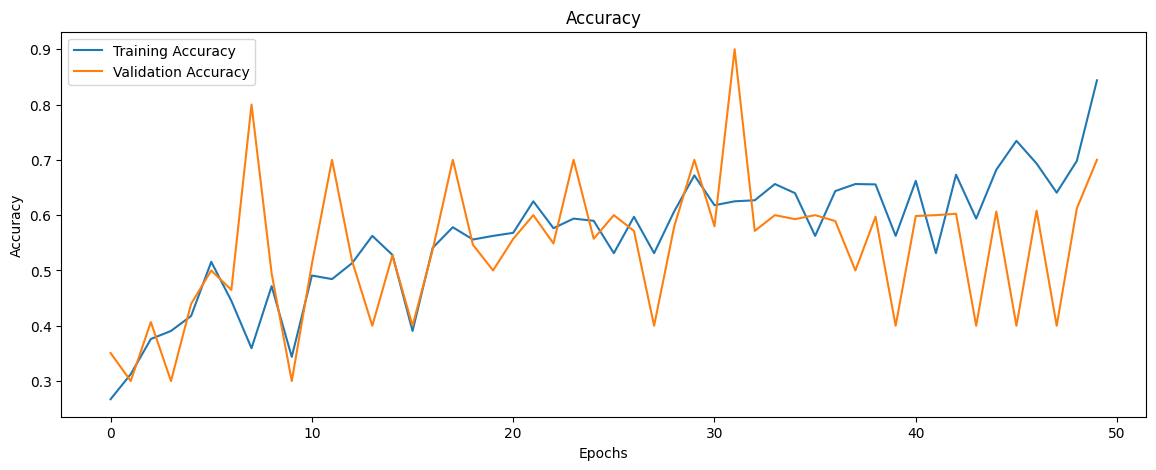

In [42]:
plt.figure(figsize=(14, 5))
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

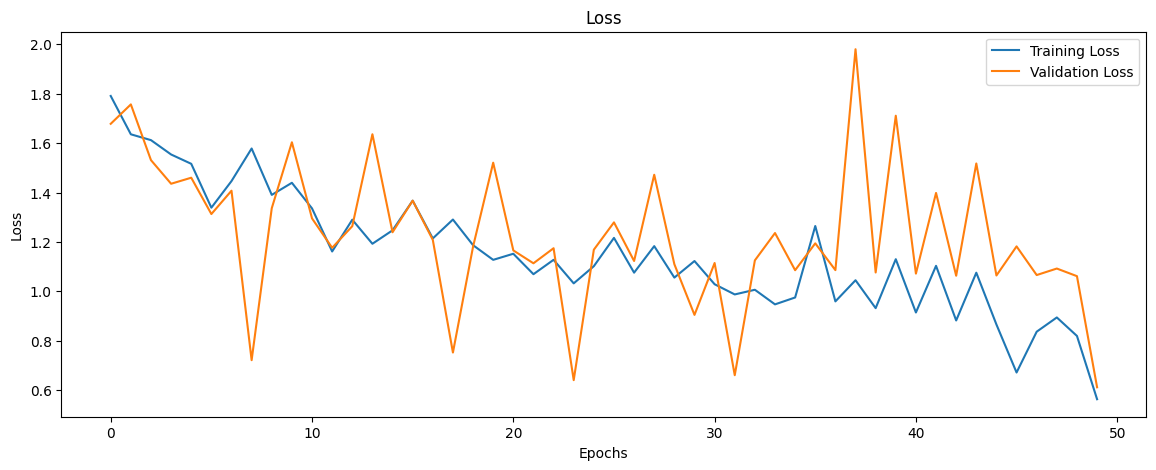

In [43]:
plt.figure(figsize=(14, 5))
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [71]:
def smooth_curve(points, factor=1.5):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

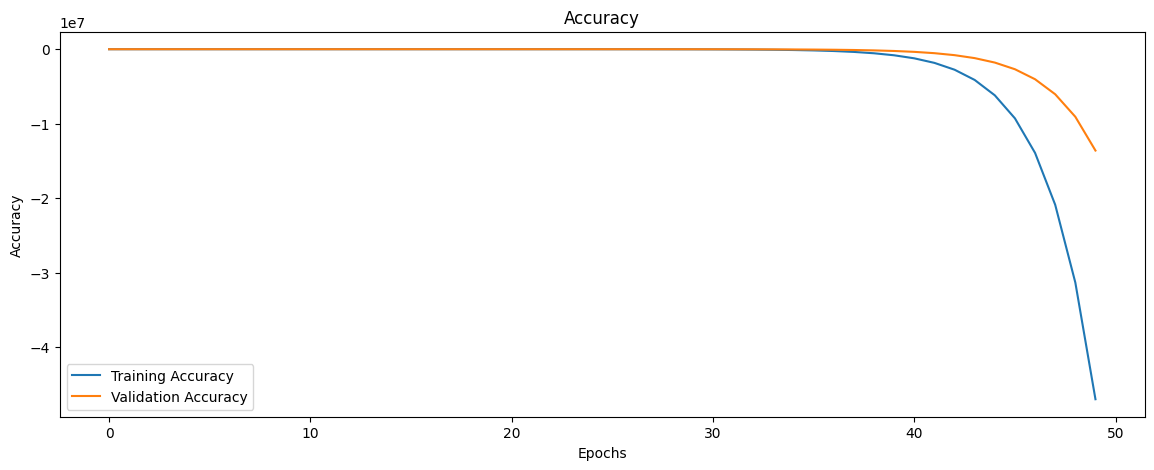

In [72]:
plt.figure(figsize=(14, 5))
plt.plot(smooth_curve(emotion_model_info.history['accuracy']), label='Training Accuracy')
plt.plot(smooth_curve(emotion_model_info.history['val_accuracy']), label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

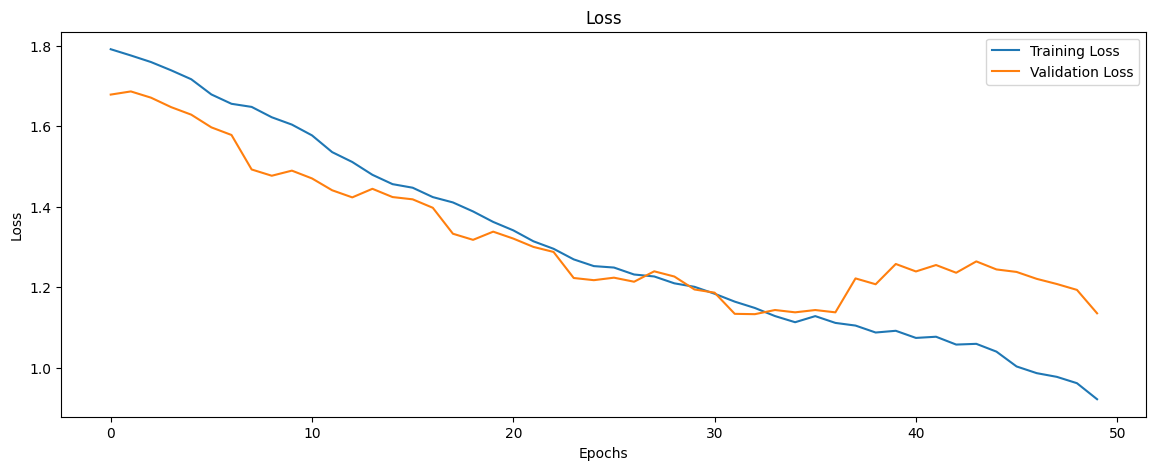

In [70]:
plt.figure(figsize=(14, 5))
plt.plot(smooth_curve(emotion_model_info.history['loss']), label='Training Loss')
plt.plot(smooth_curve(emotion_model_info.history['val_loss']), label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [17]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

In [18]:
emotion_model.save_weights('emotion_model.weights.h5')

In [19]:
from tensorflow.keras.models import load_model

In [20]:
from keras.models import model_from_json

In [21]:
import numpy as np

In [22]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [23]:
with open("emotion_model.json", "r") as json_file:
    loaded_model_json = json_file.read()

In [35]:
json_file.close()

In [25]:
emotion_model = model_from_json(loaded_model_json)

In [26]:
emotion_model.load_weights("emotion_model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [46]:
cap = cv2.VideoCapture(0)

In [47]:
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    frame = cv2.resize(frame, (1280, 720))
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━